<h1 style="text-align: center;"><strong>Deep Learning & IA</strong></h1>
<h2 style="text-align: center;"><strong>Aula 11 - Redes Neurais Multicamadas - Exercício</strong></h2>
<h4 style="text-align: center;"><strong>FIAP - 2025</strong></h4>
<br>
<br>


Manuela Euzébio Niero

RM #####

# Exercício: Autenticação de Notas Falsas com MLP

Neste exercício, você irá construir um modelo MLP para classificar notas de dinheiro como verdadeiras ou falsas com base em características extraídas de imagens das notas.

O dataset utilizado será o **Banknote Authentication Dataset** do UCI Repository.

---

### Instruções:

1. Carregue o dataset: [Banknote Authentication - Data Link](https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt).
2. Separe as features (variância, assimetria, curtose, entropia) e o rótulo (classe).
3. Divida o conjunto de dados em treino e validação (70%/30%).
4. Normalize os dados com `StandardScaler`.
5. Construa um MLP com:
   - 1 camada oculta de 16 neurônios (`relu`),
   - 1 camada de saída de 1 neurônio (`sigmoid`).
6. Compile com:
   - `loss='binary_crossentropy'`,
   - `optimizer='adam'`,
   - `metrics=['accuracy']`.
7. Treine com EarlyStopping monitorando `val_loss`.
8. Plote as curvas de loss e accuracy.
9. Avalie:
   - Houve overfitting?
   - Qual a accuracy de validação?
   - Que técnicas poderiam melhorar o modelo?

In [ ]:
# Imports
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carregar o dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
colunas = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df = pd.read_csv(url, names=colunas)

df.head(3)

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Features e Target
X = df.drop('class', axis=1)
y = df['class']

# Separando entre treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Standarizando
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model = keras.Sequential([
    keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4973 - loss: 0.7066 - val_accuracy: 0.5121 - val_loss: 0.6793
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5500 - loss: 0.6645 - val_accuracy: 0.5995 - val_loss: 0.6501
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5957 - loss: 0.6389 - val_accuracy: 0.6869 - val_loss: 0.6226
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6979 - loss: 0.6077 - val_accuracy: 0.7063 - val_loss: 0.5970
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7227 - loss: 0.5816 - val_accuracy: 0.7306 - val_loss: 0.5721
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7579 - loss: 0.5562 - val_accuracy: 0.7500 - val_loss: 0.5470
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7613 - loss: 0.5340 - val_accuracy: 0.7646 - val_loss: 0.5219
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7783 - loss: 0.5164 - val_accuracy: 0.7864 - val_loss

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


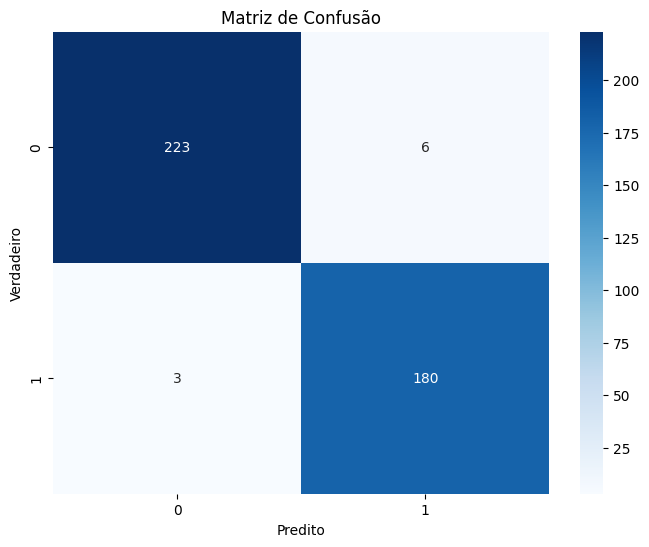

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_probs = model.predict(X_val_scaled)
y_pred_classes = (model.predict(X_val_scaled) > 0.5).astype(int).flatten()

# Gerar a matriz de confusão
cm = confusion_matrix(y_val, y_pred_classes)

# Plotar a matriz
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d',
            yticklabels=1,
            xticklabels=1)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {accuracy:.2f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8091 - loss: 0.6709 
Test accuracy: 0.83


In [ ]:
# =====================================================================
# Função para plotar o histórico de treino e validação
# =====================================================================
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(14,5))

    # Loss
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss - Train vs Validação')
    plt.legend()

    # Accuracy
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy - Train vs Validação')
    plt.legend()

    plt.tight_layout()
    plt.show()

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5372 - loss: 0.8113 - val_accuracy: 0.6068 - val_loss: 0.7138 - learning_rate: 5.0000e-04
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6466 - loss: 0.7121 - val_accuracy: 0.8131 - val_loss: 0.6443 - learning_rate: 5.0000e-04
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6920 - loss: 0.6598 - val_accuracy: 0.8811 - val_loss: 0.5572 - learning_rate: 5.0000e-04
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7929 - loss: 0.5670 - val_accuracy: 0.9320 - val_loss: 0.4573 - learning_rate: 5.0000e-04
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8448 - loss: 0.4743 - val_accuracy: 0.9442 - val_loss: 0.3580 - learning_rate: 5.0000e-04
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8913 - loss: 0.4112 - val_accuracy: 0.9563 - val_loss: 0.2772 - learning_rate: 5.0000e-04
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9332

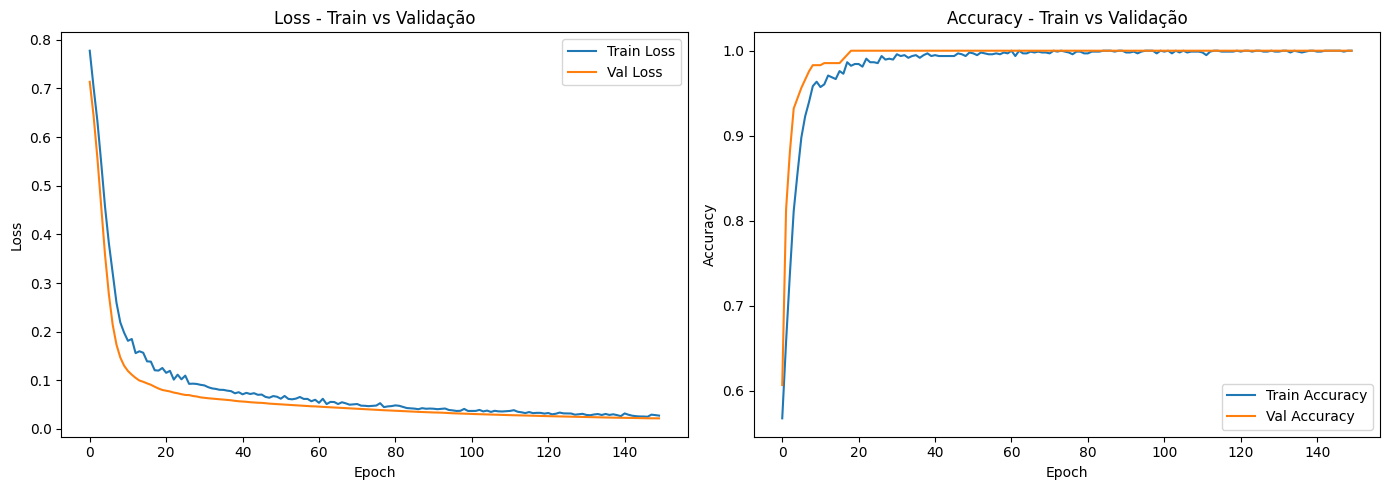


🔎 Melhor Val Accuracy (avançado): 1.0000 na época 19


In [ ]:
# Construir modelo avançado
def build_mlp_model_avancado(input_shape, hidden_layers=[64, 32, 16], dropout_rate=0.3, l2_strength=0.001):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(input_shape,)))

    for units in hidden_layers:
        model.add(keras.layers.Dense(
            units,
            activation='relu',
            kernel_regularizer=keras.regularizers.l2(l2_strength)
        ))
        model.add(keras.layers.Dropout(dropout_rate))

    model.add(keras.layers.Dense(1, activation='sigmoid'))  # binária

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Treinamento
model_avancado = build_mlp_model_avancado(
    input_shape=X_train_scaled.shape[1],
    hidden_layers=[64, 32, 16],
    dropout_rate=0.3,
    l2_strength=0.001
)

early_stop_advanced = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr_advanced = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

history_avancado = model_avancado.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=150,
    batch_size=32,
    callbacks=[early_stop_advanced, reduce_lr_advanced],
    verbose=1
)

# Plotar resultados
plot_training_history(history_avancado)

# Melhor desempenho
melhor_val_accuracy_avancado = max(history_avancado.history['val_accuracy'])
melhor_epoch_avancado = np.argmax(history_avancado.history['val_accuracy']) + 1
print(f"\n🔎 Melhor Val Accuracy (avançado): {melhor_val_accuracy_avancado:.4f} na época {melhor_epoch_avancado}")